# King County Realestate Analysis and Modelling.

## Business Problem

##  Introduction
The realestate business has for a long time been of great interest to investors. Any party interested in investing in the realestate business will undoubtedly benefit from prior analysis of already existing data on the state of the market in order to minimize risk and maximize ROI. 
We got data from various sources such as the `kc_house_data.csv` file from Kaggle that we are going to perform anlysis and modelling on.

### Stakeholders Name: ALPHA TENNENT

## 1. Project Overview
in our analysis, we explored the data provided by Alpha Tennent Stakeholders and build a multiple linear regression model with some of the features stipulated in the dataset. Hencefourth, the analaysis done and the results came to a solution and on the following factors that have a significant impact on the price of the King County Dataset:

* Have a house by the waterfront
* Increase the number of bathrooms as the number of bedrooms increases
* Improve the overall grade of the home
* Strive to maintain the house to ensure that its in good condition
* Increase the number of floors and the size of the basement

### 1.1 Problem Statement
We will be reviewing building grade, square-footage of living space, and location-related factors such as proximity to schools, coffee shops, parks, and scientology churches to determine which factors are highly correlated with home sale prices.

### 1.2 Objective

#### Main Objective
The main objective is to come up with a predictive /accurate model that is an improvement of the baseline model for better house price prediction in King County.

#### Specific Objectives
- To find out how renovation status affects sale price?
- To determine whether how the number of bedrooms is related to the pricing of the house?
- To determine if the floor number affects the pricing of the house?
- To relate the year built affects/ is related to the house pricing?
- To find whether the condition of the house is related to the house pricing?

### 1.3 Experimental Design Taken.
Implement changes as we go on with the project

This phase is broken down into four tasks together with its projected outcome or output in detail:

Collect Initial Data
Describe Data
Explore Data
Verify Data Quality
There was no need to collect any data for this project as it was already provided by the stakeholder. The data consists of house data from King County and is in .csv format.

## 2. Data Wrangling and Understanding

### 2.1 Columns Descriptions

The main dataset we are using comes from the King County housing [dataset](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction) that contains information on house sales between May 2014 and May 2015 consist of the following variables:

- date: Date of house sale
- price: The price which the house sold for
- bedrooms: How many bedrooms the house has
- bathrooms: How many bathrooms the house has
- sqft_living: How much square footage the house has
- sqft_lot: How much square footage the lot has
- floors: How many floors the house has
- waterfront: Whether the house is on the - - - - waterfront. Originally contained ‘YES’ or ‘NO’, converted to 0 or 1 for comparative purposes
- view: Whether the house has a view and whether it’s fair, average, good, or excellent. Converted to numberical (0-4) for comparative purposes
- condition: overall condition of the house: Poor, Fair, Average, Good, Very Good
- grade: Numerical grading for house
sqft_above: How much of the houses square footage is above ground
- sqft_basement: How much of the square footage is in the basement
- yr_built: Year the house was built
- yr_renovated: Year the house was renovated, if applicable
- zipcode: House zipcode
- lat: House’s latitude coordinate
- long: House’s longitude coordinate
- sqft_living15: Average size of living space for the closest 15 houses
- sqft_lot15: Average size of lot for the - - closest 15 houses

In [1]:
# importing libraries for data handling
import numpy as np
import pandas as pd
# importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno confirm how to import it and its purpose
import folium
import warnings
# importing libraries for data handling
import numpy as np
import pandas as pd

# importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno confirm how to import it and its purpose
import folium
import warnings
# importing libraries for modeling
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# importing libraries for statistics
import scipy.stats as stats

# importing libraries for styling
plt.style.use('seaborn')
sns.set_style('whitegrid')

warnings.filterwarnings('ignore')

In [2]:
#import main data file
kc_hses = pd.read_csv('data/kc_house_data.csv')

In [3]:
#list columns
print(kc_hses.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [4]:
#display first rows
kc_hses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### 2.2  Data Munging

In [5]:
#info
kc_hses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#determine missing values
kc_hses.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

we can see that the columns with missing data are `waterfront`, `view`, and `yr_renovated`. This accounts for *11%*, *0.3%*, and *18%* of the total number of rows in the dataset respectively.

The `bathrooms` feature seems to contain **float** values which shouldnt be the case. Lets attempt to normalize them by rounding. 

In [7]:
#normalize 'bathrooms' column
kc_hses['bathrooms'] = kc_hses['bathrooms'].apply(lambda x: int(round(x, 0)))

### 2.2 EDA

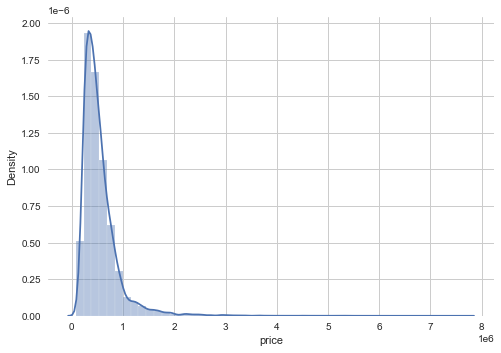

In [8]:
#Visualize price
sns.distplot(kc_hses['price'], kde=True)
plt.show();

Price is normally distributed although skewed to the right. There may be outliers causing the skew. In the context of realestate these outliers may be valid and may not warrant dropping.

In [9]:
kc_hses.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms            9
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [10]:
kc_hses['bathrooms'].value_counts()

2    13847
1     3931
3     2527
4     1201
5       57
6       24
8        4
0        4
7        2
Name: bathrooms, dtype: int64

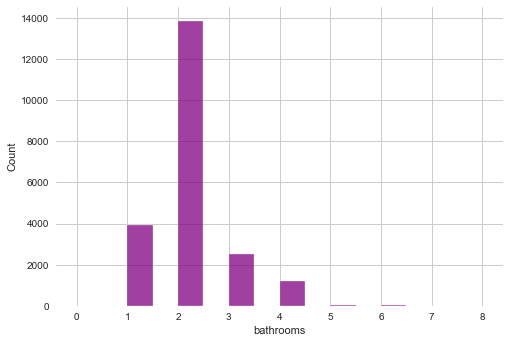

In [11]:
#plot bathrooms distribution
sns.histplot(kc_hses['bathrooms'], kde=False, color='purple')
plt.show();

In [25]:
# sns.boxplot(kc_hses['bathrooms']);

#### Observation
* Most properties seem to have 2 bathrooms on average. The kde function seems to look a bit strange owing to `bathrooms` beign a categorical feature.

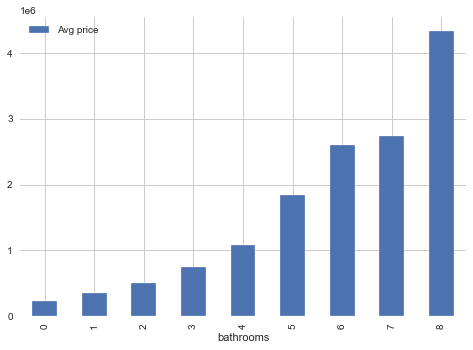

In [13]:
#plot bar of bathrooms against price
kc_hses.groupby('bathrooms')['price'].mean().plot.bar(x='bathrooms', label='Avg price')
plt.legend()
plt.show()

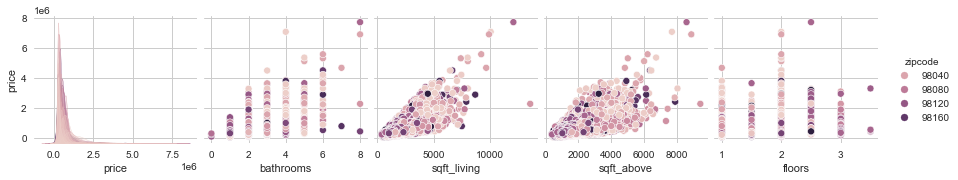

In [14]:
#plot scatterplots 
xvars = ['price', 'bathrooms', 'sqft_living', 'sqft_above', 'floors']
yvars = ['price']
sns.pairplot(kc_hses, x_vars=xvars, y_vars=yvars, hue='zipcode')
plt.show();

- `bathrooms` and `floors` are categorical features. We can use **One-Hot Encoding** to transform our model based on these features.
- `sqft-living` and `sqft_above` seem to have a linear relationship with `price`

In [15]:
#plot correlation heatmap
kc_hses_correlation = kc_hses.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
kc_hses_correlation

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,-0.01,-0.01,-0.13,0.02,-0.01,0.02,-0.01,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.52,0.70,0.09,0.26,0.61,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.49,0.58,0.03,0.18,0.48,0.16,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,-0.01,0.52,0.49,1.00,0.70,0.09,0.37,0.60,0.38,0.07,-0.14,0.05,0.15,0.50,0.09
sqft_living,-0.01,0.70,0.58,0.70,1.00,0.17,0.35,0.88,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.00,0.18,0.05,0.00,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.37,0.35,-0.00,1.00,0.52,0.49,0.00,-0.06,0.05,0.13,0.28,-0.01
sqft_above,-0.01,0.61,0.48,0.60,0.88,0.18,0.52,1.00,0.42,0.02,-0.26,-0.00,0.34,0.73,0.20
yr_built,0.02,0.05,0.16,0.38,0.32,0.05,0.49,0.42,1.00,-0.23,-0.35,-0.15,0.41,0.33,0.07
yr_renovated,-0.01,0.13,0.02,0.07,0.06,0.00,0.00,0.02,-0.23,1.00,0.07,0.03,-0.07,-0.00,0.00


We see Strong positive correlation between `price` and the features: `bathrooms`, `sqft_living` and `sqft_above`, 

In [16]:
#dropping the following columns id, date, lat, sqft_living15, zipcode, long, floors, sqft_lot15
cols_to_drop = ['id', 'date', 'lat','sqft_living15','long', 'floors', 'sqft_lot15']
kc_hses.drop(cols_to_drop, axis=1, inplace=True)
kc_hses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  int64  
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   waterfront     19221 non-null  object 
 6   view           21534 non-null  object 
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
 13  zipcode        21597 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 2.3+ MB


#### Observation
* The above columns were dropped because they don't have strong correlation with the price that is to say ,they are not the high determinant influencing the houses' prices

`sqft_above` is strongly correlated with `sqft_living`. This may be because living space are typycally located above ground. In this case we may drop `sqft_above`.

In [17]:
kc_hses.drop('sqft_above', axis=1, inplace=True)
kc_hses.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode'],
      dtype='object')

In [18]:
# Function to describe the data and plot the histogram, kde and boxplot of the data
def desc_and_plot(df, col, title, bins_='auto'):
    ''' Describes and Plots the distribution of a column in a dataframe as a histogram, kde and boxplot '''
    print(df[col].describe())
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))
    
    # assign a graph to each ax
    sns.boxplot(df[col], ax=ax_box, color='lightgreen')
    sns.histplot(data=df, x=col, ax=ax_hist, kde=True, color='lightgreen', bins=bins_, edgecolor='black')
    plt.suptitle(title)
    plt.tight_layout();

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64


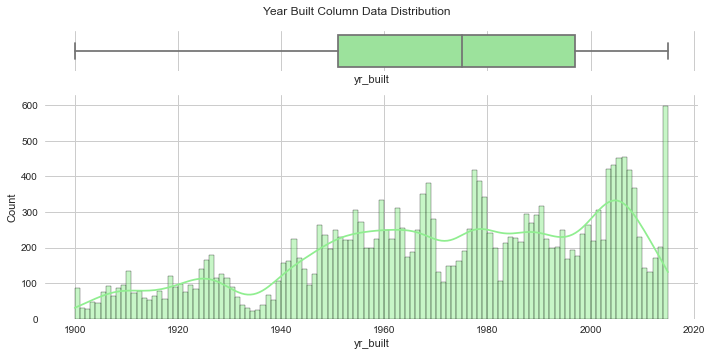

In [19]:
# Visualise the data distribution
desc_and_plot(kc_hses, 'yr_built', 'Year Built Column Data Distribution', 115)

#### Observation
* From the distributions above we can see that the data is slightly skewed to the left. 
* The oldest house in the dataset was built in 1900, and the newest house in the dataset was built in 2015.
* The mean year the houses in the dataset were built is 1971, and the median year the houses in the dataset were built is 1975. 
* The standard deviation of the year built column is 29.37

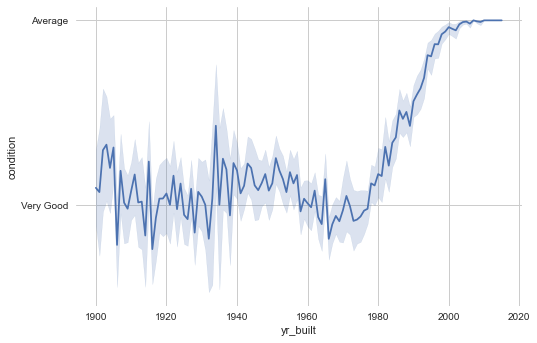

In [20]:
#plot barchart of 'condition' against 'year built'
sns.lineplot(x='yr_built', y='condition', data=kc_hses)
plt.show();

#### Observation
* For most houses built in the $20th$ century *i.e* 1900-early 1990s houses were in Very good condition. 
* For most houses built from the begining of the $21st$ century, the condition is Average. There seems to be a decline in condition of houses built over time

#### Bedrooms

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


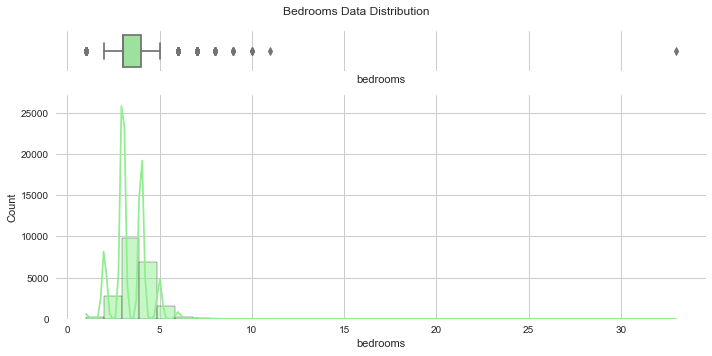

In [21]:
#plot bedrooms distribution
desc_and_plot(kc_hses, 'bedrooms', 'Bedrooms Data Distribution', 33)

In [26]:
kc_hses['bedrooms'].value_counts()
# replace '33' or keep ???

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

#### Observation

* The maximum number of bedrooms in the dataset in 33
* The minimum number of bedrooms in the dataset is 1
* The mean number of mean number of bedrooms is 3.37 and the median number of bedrooms is 3.
* The standard deviation of the bedroom column is 0.93

#### 2.2 Univatiate analysis
In this section, we'll explore each column in the dataset to see the distributions of features and obtain some useful insights. The main two parts in this section are:

Categorical Columns
Numerical Columns
2.2.1 Categorical Columns
There are 5 Categorical Columns in the dataset that are:

* id
* waterfront
* view
* condition
* grade
* zipcode

We won't use id and zipcode since we have already dropped the

## Data Preparation

## Analysis and Modeling

## Results 

## Conclusion

## Recommendations